# SETUP

In [1]:
!pip install scikeras[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [3]:
dataset = tf.keras.datasets.fashion_mnist
(train_x,train_y),(test_x,test_y) = dataset.load_data()
train_x = train_x / 255
test_x = test_x / 255

4422102/4422102 [==============================] - 0s 0us/step


# Part 1a

In [4]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs = None):
        self.time_log = 0

    def on_epoch_begin(self, batch, logs = None):
        self.start_time = time.time()

    def on_epoch_end(self, batch, logs = None):
        self.times_log = time.time() - self.start_time # Current time - strating time

In [5]:
class SequentialModel:
  def __init__(self, batch_size, relu_M, softmax_M = 10):
    # dense_units -> M
    self.batch_size = batch_size
    self.relu_M = relu_M
    self.softmax_M = softmax_M
    # Creating Sequential Model
    self.model = tf.keras.models.Sequential(
        layers = [
            tf.keras.layers.Flatten(input_shape = (28, 28)),
            tf.keras.layers.Dense(units = self.relu_M, activation = "relu"),
            tf.keras.layers.Dense(units = self.softmax_M, activation = "softmax")
        ]
    )

  # Trains model for 1a, returns integer time of training
  def run_1a(self):
    sgd_optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, weight_decay = 0.001)
    self.model.compile(optimizer = sgd_optimizer,
                  loss = "sparse_categorical_crossentropy",
                  metrics = ["accuracy"],
                  run_eagerly = True)
    callback = CustomCallback() # used to determine the timings of each trial
    epoch_timing = 0
    
    model_accuracy = 0 # Used to stop while loop

    while (model_accuracy < 0.8): # Stop when model accuracy reaches 0.8
      # Train Model
      model_history = self.model.fit(x = train_x,
                                y = train_y,
                                epochs = 1,
                                batch_size = self.batch_size,
                                validation_split = 0.2,
                                shuffle = True,
                                callbacks = [callback]) # Used to determine the timings
      
      # Extract Accuracy Data
      model_accuracy = model_history.history["accuracy"][0] # Update accuracy
      epoch_timing += callback.times_log # update timing

    return epoch_timing # return time taken

  # Trains model for 1b
  def run_1b(self, learning_rate, weight_decay):
    # Creating optimizer
    sgd_optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate, 
                                            weight_decay = weight_decay)
    
    # Compile Model
    self.model.compile(optimizer = sgd_optimizer,
                       loss = "sparse_categorical_crossentropy",
                       metrics = ["accuracy"])
    
    # Fit Model
    model_history = self.model.fit(x = train_x,
                              y = train_y,
                              batch_size = 512,
                              epochs = 30,
                              validation_split = 0.2,
                              shuffle = True,
                              verbose = 0) # Won't display the progress bar

    # Plot loss, val_loss
    self.plot(axis_range = 30,
              x = model_history.history["loss"],
              y = model_history.history["val_loss"],
              title = f"Loss Plot for relu M: {self.relu_M} Learning Rate: {learning_rate} Lambda: {weight_decay}",
              x_label = "train_loss",
              y_label = "val_loss",
              y_title = "Multiclass Cross-Entropy Loss")

    # Plot accuracy, val_accuracy
    self.plot(axis_range = 30,
              x = model_history.history["accuracy"],
              y = model_history.history["val_accuracy"],
              title = f"Accuracy Plot for relu M: {self.relu_M} Learning Rate: {learning_rate} Lambda: {weight_decay}",
              x_label = "train_acc",
              y_label = "val_acc",
              y_title = "Accuracy")
    
    return model_history

  def plot(self, axis_range, x, y, title, x_label, y_label, y_title, x_title = "Epoch Count"):
    plt.plot(range(axis_range), x, label = x_label)
    plt.plot(range(axis_range), y, label = y_label)
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.legend()
    plt.show()

In [ ]:
# Testing Accuracy with different Batch Sizes and Trials
batch_sizes = [16, 32, 64, 128, 160] # Batch sizes
trails = 5
timing_log = [] # Epoch Timings

print(f"Sequential Model Training")
for batch in batch_sizes:
  print(f"Batch Size: {batch}")
  temp_times = []
  
  # Train 5 times, 5 trials
  for trail in range(trails):
    print(f"Trail {trail}")
    model = SequentialModel(batch_size = batch,
                            relu_M = 48)
    temp_times.append(model.run_1a())
  
  # Add timings to log
  timing_log.append(temp_times)


Sequential Model Training
Batch Size: 16
Trail 0
3000/3000 [==============================] - 95s 32ms/step - loss: 0.4986 - accuracy: 0.8291 - val_loss: 0.4655 - val_accuracy: 0.8372
Trail 1
3000/3000 [==============================] - 81s 27ms/step - loss: 0.4952 - accuracy: 0.8292 - val_loss: 0.4714 - val_accuracy: 0.8355
Trail 2
3000/3000 [==============================] - 83s 28ms/step - loss: 0.4955 - accuracy: 0.8309 - val_loss: 0.5737 - val_accuracy: 0.7930
Trail 3
3000/3000 [==============================] - 83s 28ms/step - loss: 0.4929 - accuracy: 0.8301 - val_loss: 0.4635 - val_accuracy: 0.8359
Trail 4
3000/3000 [==============================] - 82s 27ms/step - loss: 0.4977 - accuracy: 0.8277 - val_loss: 0.4724 - val_accuracy: 0.8382
Batch Size: 32
Trail 0
1500/1500 [==============================] - 42s 28ms/step - loss: 0.5571 - accuracy: 0.8139 - val_loss: 0.5247 - val_accuracy: 0.8184
Trail 1
1500/1500 [==============================] - 42s 28ms/step - loss: 0.5471 - ac

## Timing Averages and Standards


In [ ]:
timing_log

[[177.29779076576233,
  162.58499383926392,
  163.90724635124207,
  166.27108788490295,
  162.9346387386322],
 [81.7535548210144,
  82.98839473724365,
  82.6386170387268,
  84.04324102401733,
  84.67388081550598],
 [64.00492548942566,
  66.19939732551575,
  68.61784482002258,
  70.61024212837219,
  64.45318603515625],
 [45.86504626274109,
  56.82700037956238,
  45.1264169216156,
  58.34991097450256,
  45.09330749511719],
 [44.478317737579346,
  46.509644508361816,
  56.95671248435974,
  44.66869831085205,
  46.35237121582031]]

In [ ]:
averages = [np.average(batch) for batch in timing_log]
averages

[166.5991515159607,
 83.21953768730164,
 66.77711915969849,
 50.25233640670776,
 47.793148851394655]

In [ ]:
np.std(timing_log, axis = 1)

array([5.50194469, 1.03282164, 2.51000351, 6.01557753, 4.65713256])

# Part 1b & 1c

Creating and Traning Sequential model with M: 40 Learning Rate: 0.001 and Lambda: 0.0001


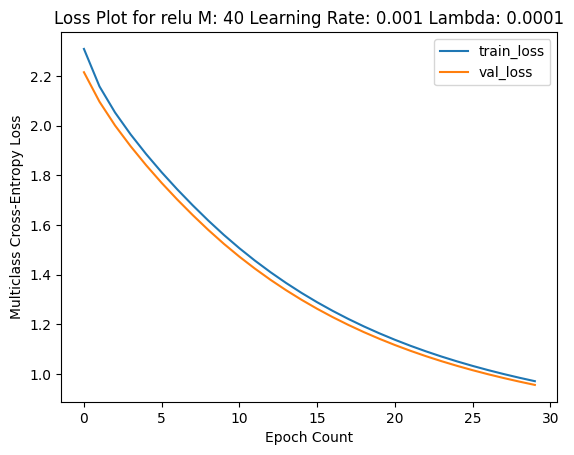

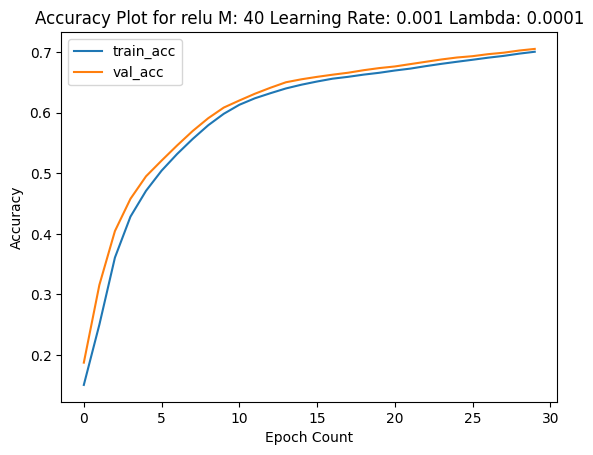

Creating and Traning Sequential model with M: 40 Learning Rate: 0.001 and Lambda: 0.001


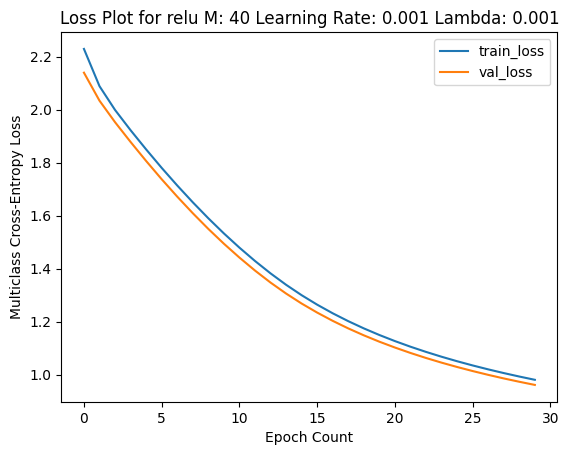

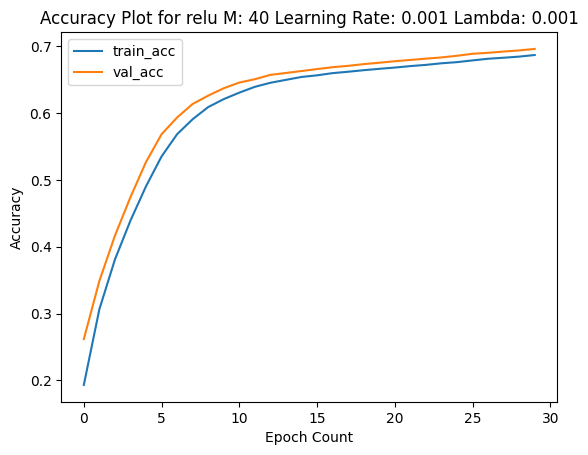

Creating and Traning Sequential model with M: 40 Learning Rate: 0.001 and Lambda: 0.01


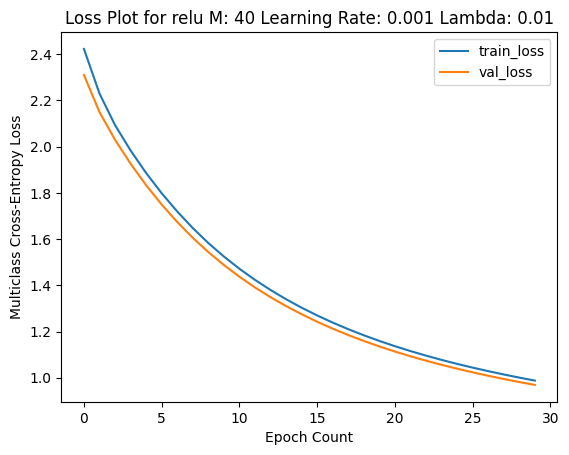

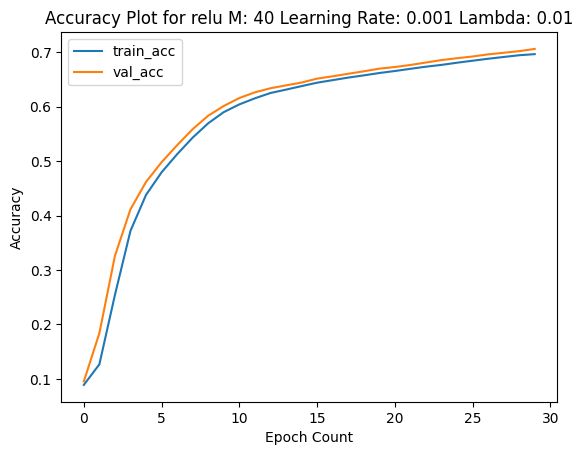

Creating and Traning Sequential model with M: 40 Learning Rate: 0.01 and Lambda: 0.0001


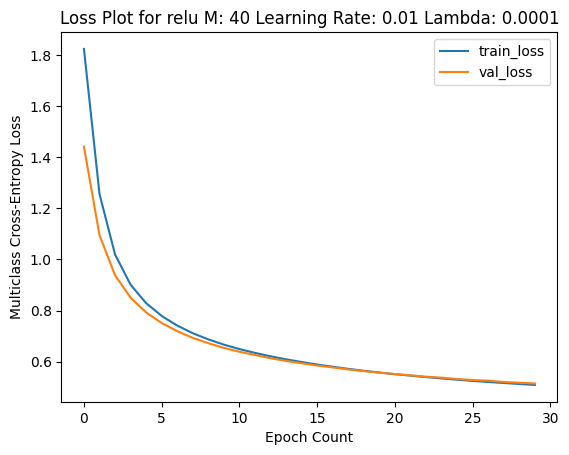

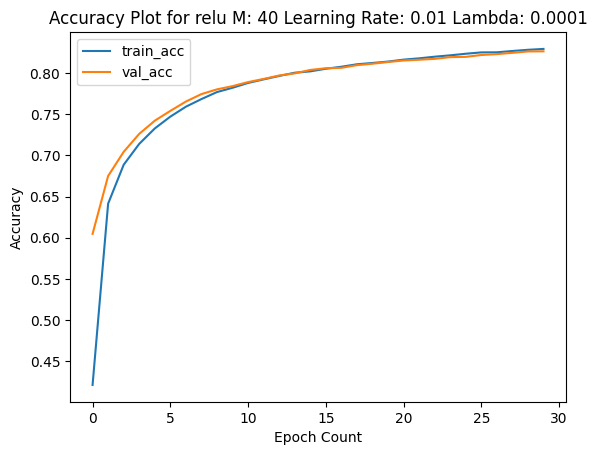

Creating and Traning Sequential model with M: 40 Learning Rate: 0.01 and Lambda: 0.001


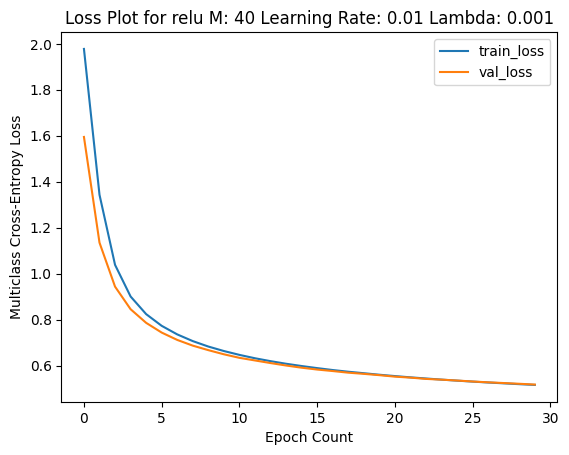

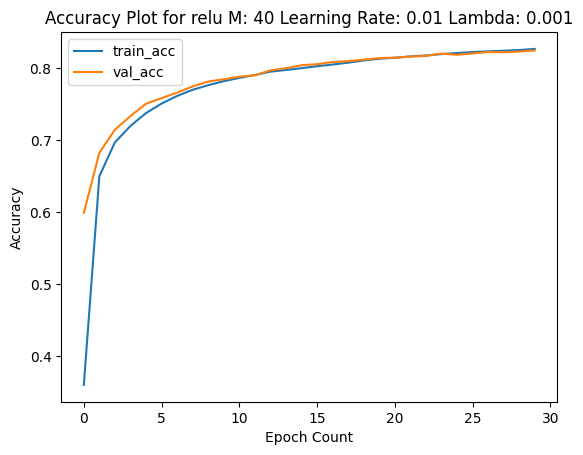

Creating and Traning Sequential model with M: 40 Learning Rate: 0.01 and Lambda: 0.01


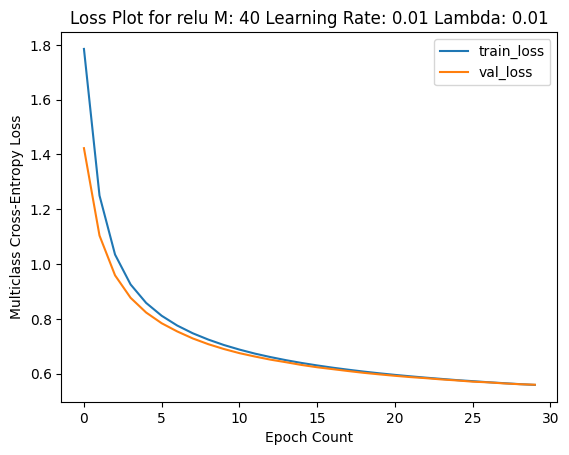

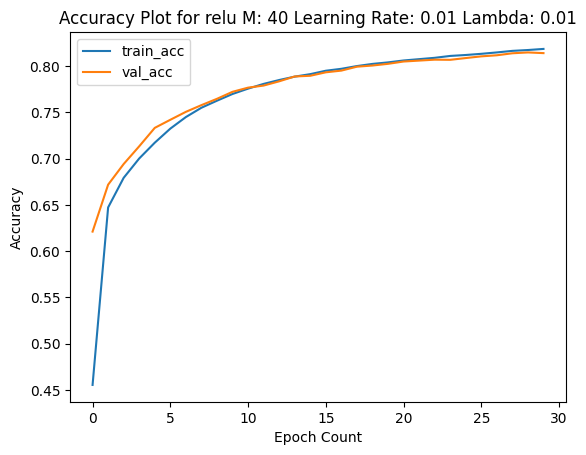

Creating and Traning Sequential model with M: 40 Learning Rate: 0.1 and Lambda: 0.0001


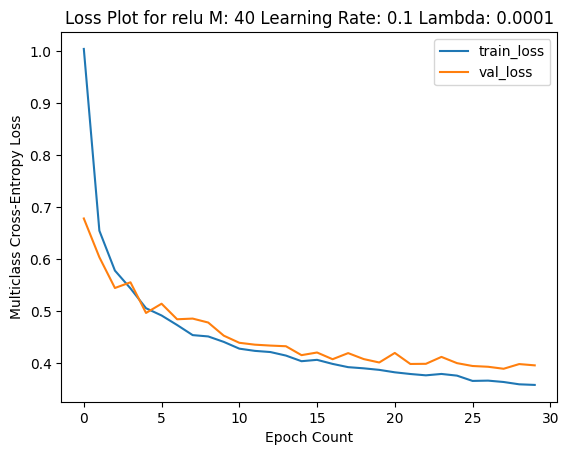

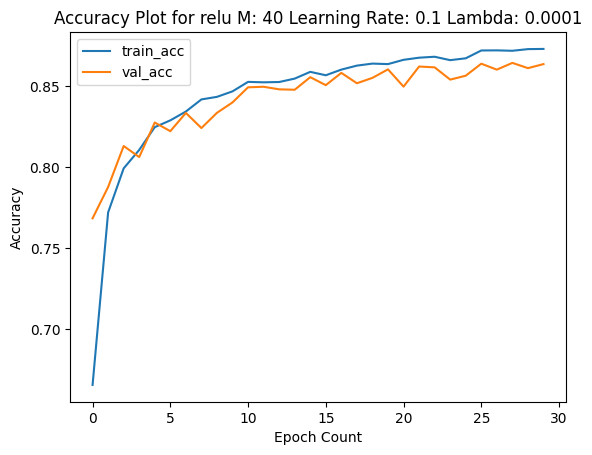

Creating and Traning Sequential model with M: 40 Learning Rate: 0.1 and Lambda: 0.001


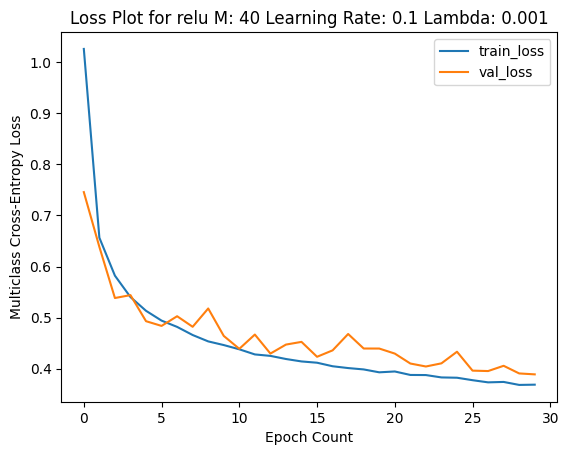

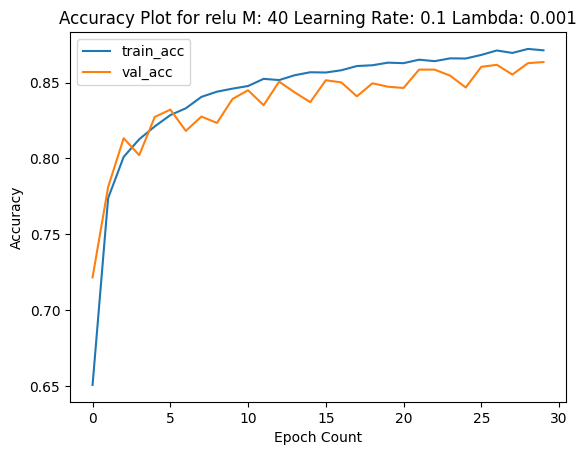

Creating and Traning Sequential model with M: 40 Learning Rate: 0.1 and Lambda: 0.01


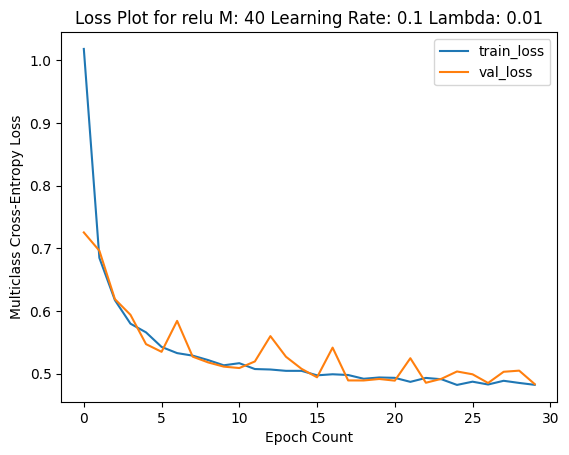

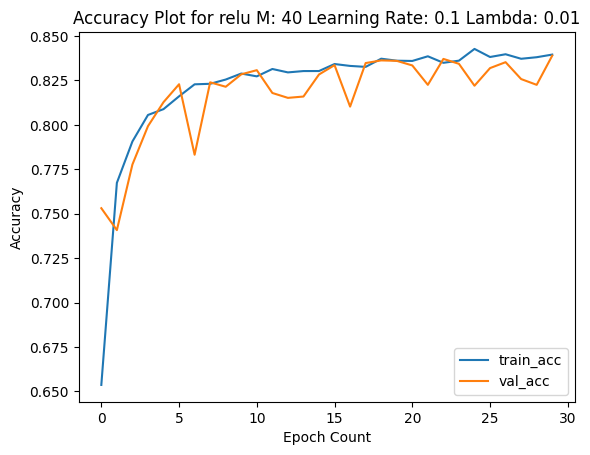

Creating and Traning Sequential model with M: 80 Learning Rate: 0.001 and Lambda: 0.0001


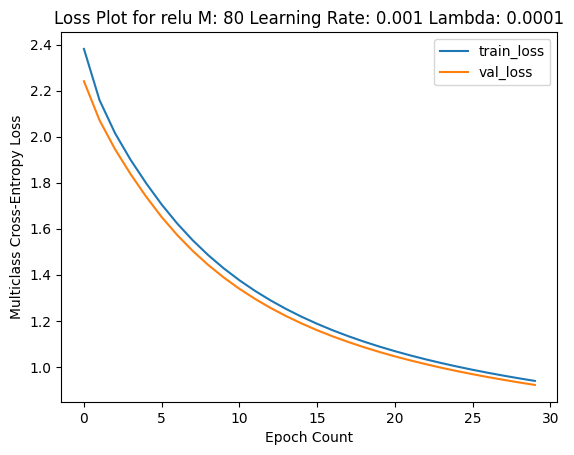

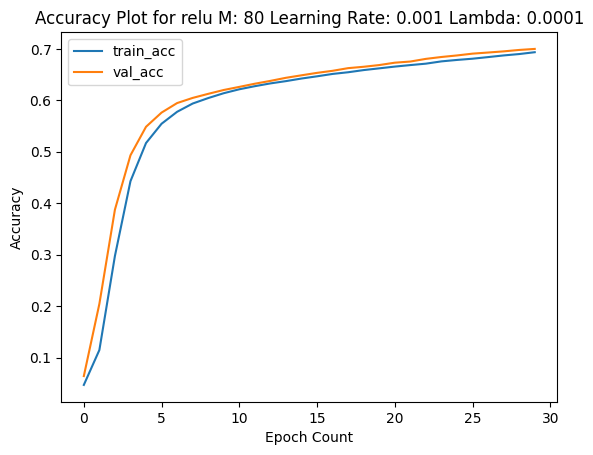

Creating and Traning Sequential model with M: 80 Learning Rate: 0.001 and Lambda: 0.001


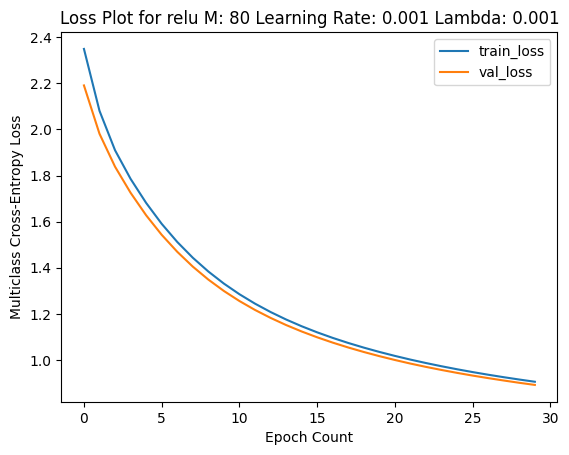

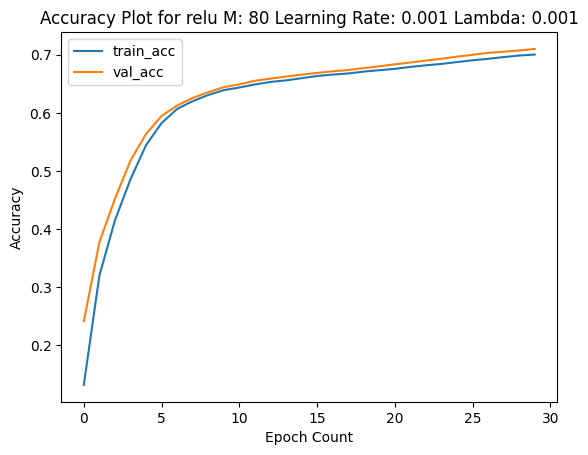

Creating and Traning Sequential model with M: 80 Learning Rate: 0.001 and Lambda: 0.01


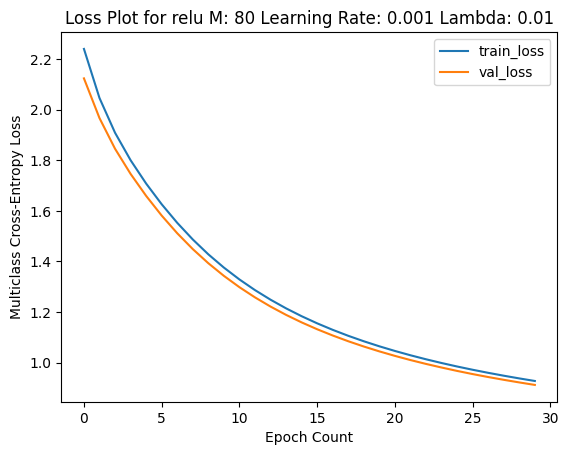

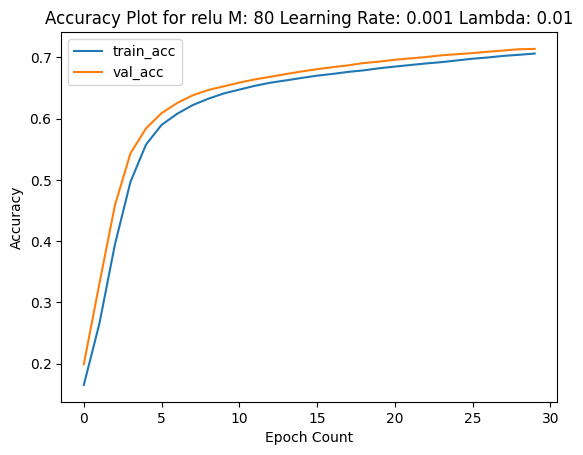

Creating and Traning Sequential model with M: 80 Learning Rate: 0.01 and Lambda: 0.0001


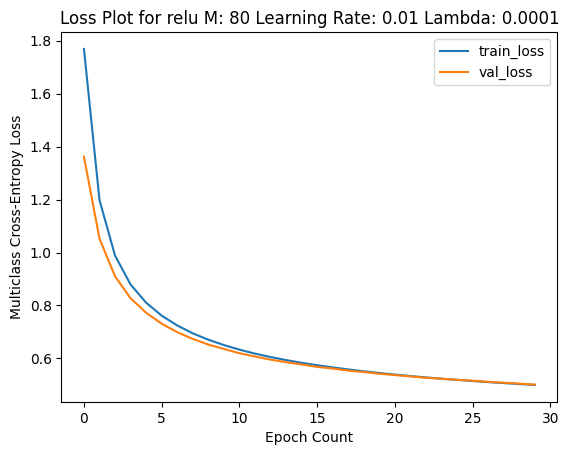

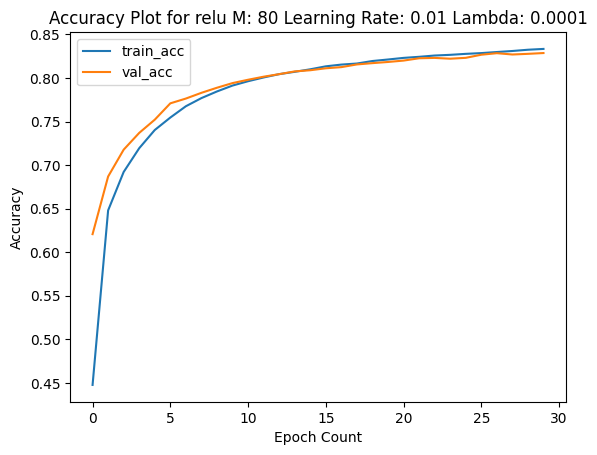

Creating and Traning Sequential model with M: 80 Learning Rate: 0.01 and Lambda: 0.001


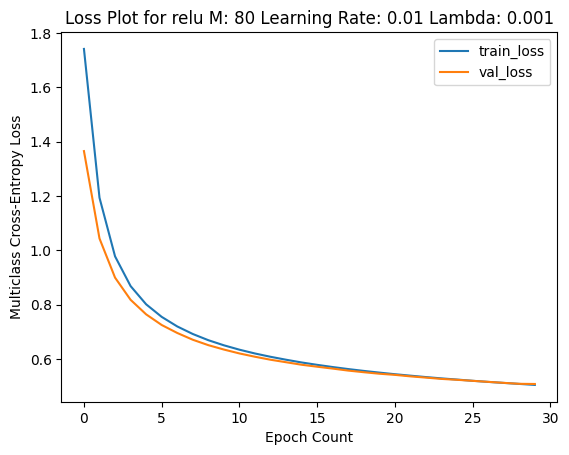

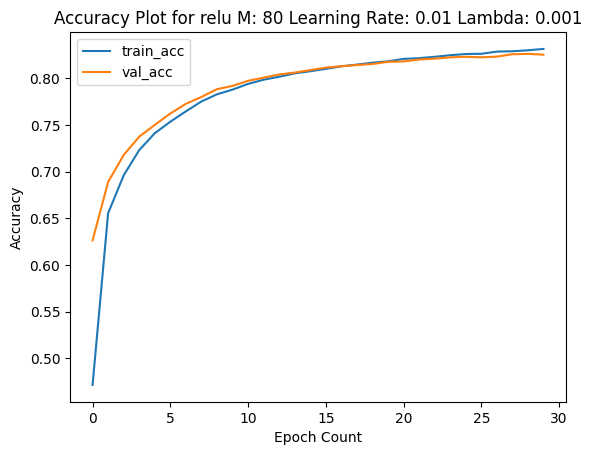

Creating and Traning Sequential model with M: 80 Learning Rate: 0.01 and Lambda: 0.01


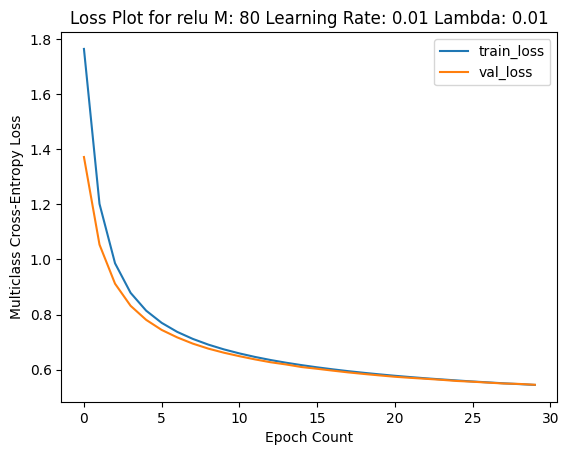

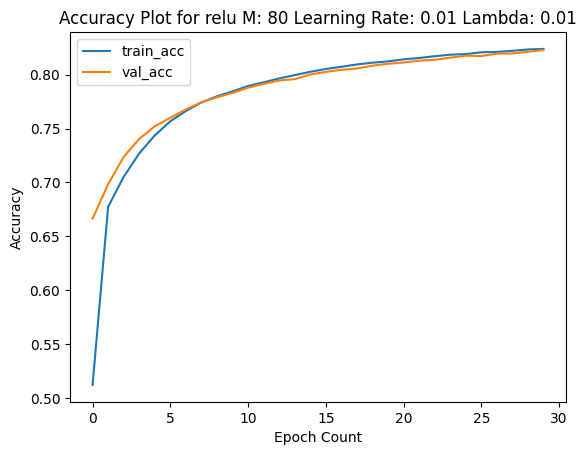

Creating and Traning Sequential model with M: 80 Learning Rate: 0.1 and Lambda: 0.0001


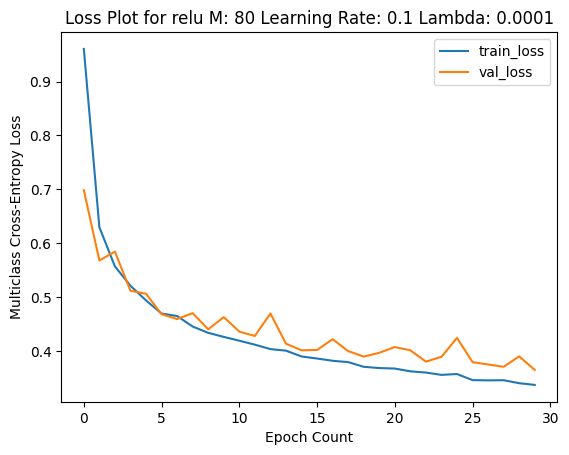

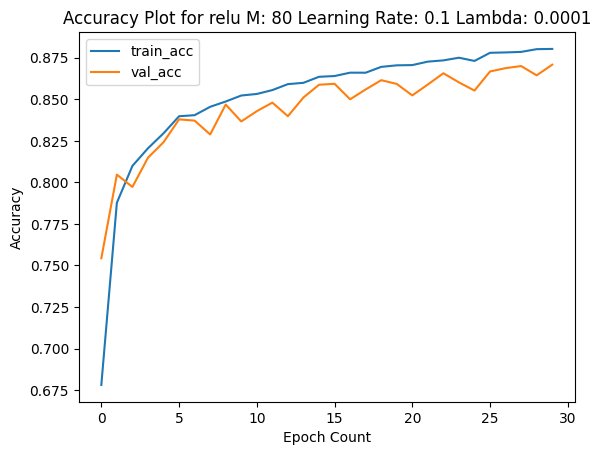

Creating and Traning Sequential model with M: 80 Learning Rate: 0.1 and Lambda: 0.001


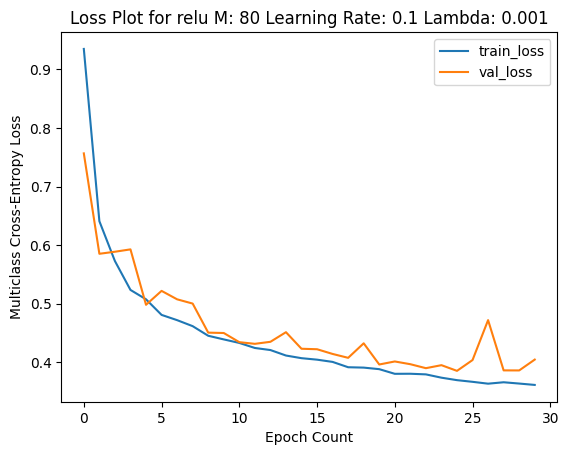

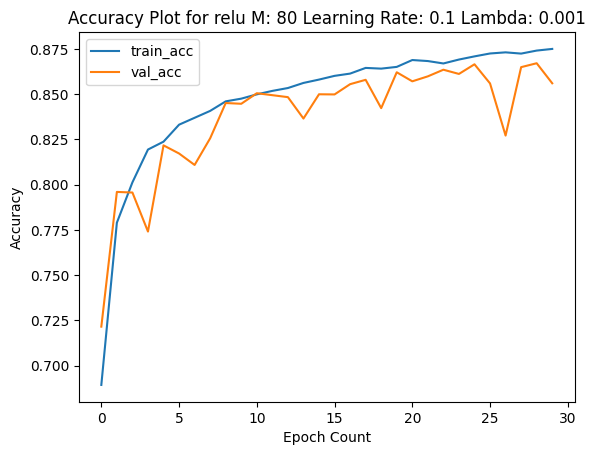

Creating and Traning Sequential model with M: 80 Learning Rate: 0.1 and Lambda: 0.01


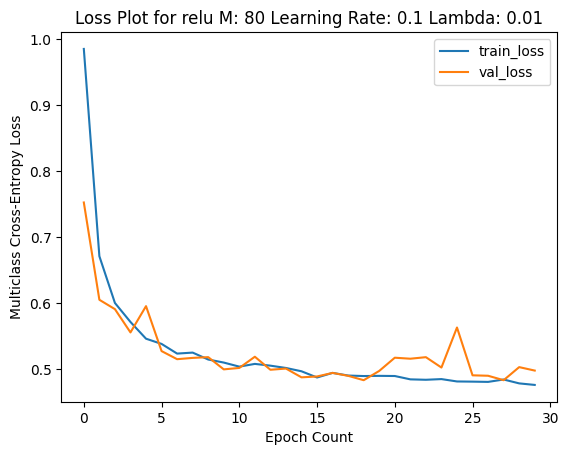

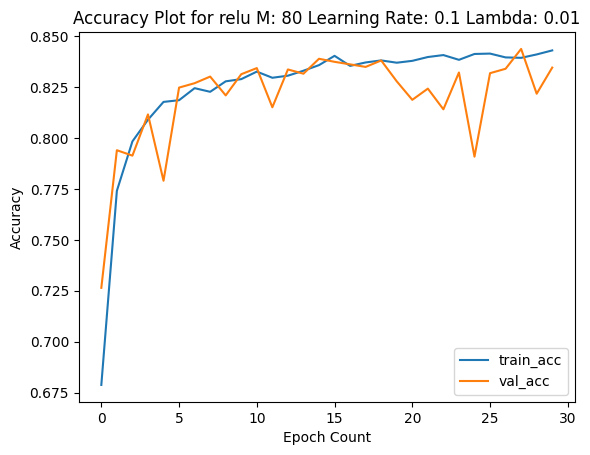

Creating and Traning Sequential model with M: 160 Learning Rate: 0.001 and Lambda: 0.0001


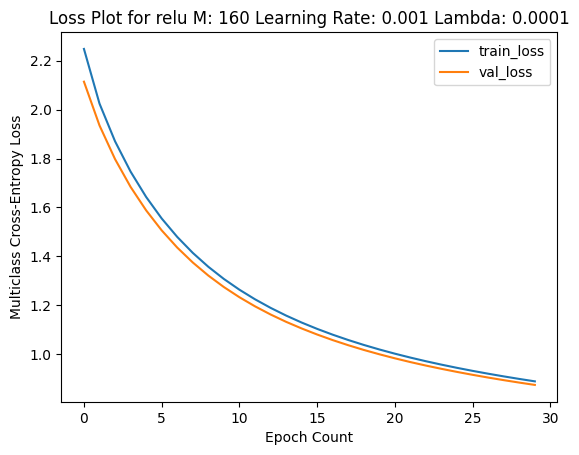

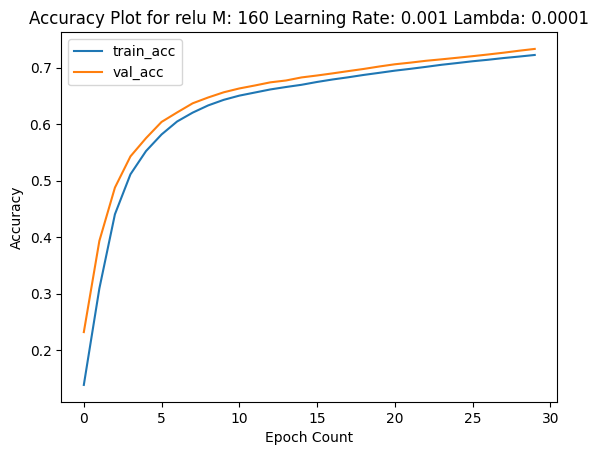

Creating and Traning Sequential model with M: 160 Learning Rate: 0.001 and Lambda: 0.001


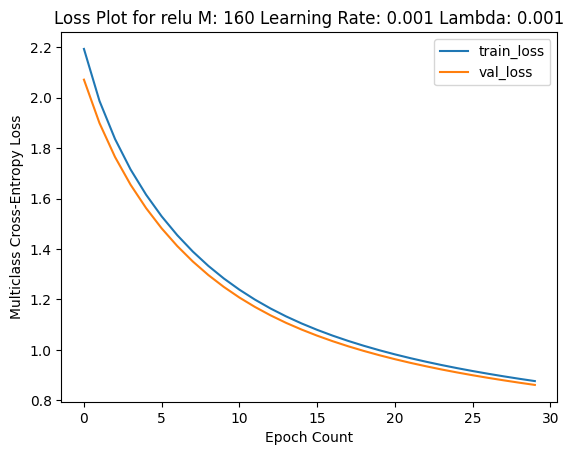

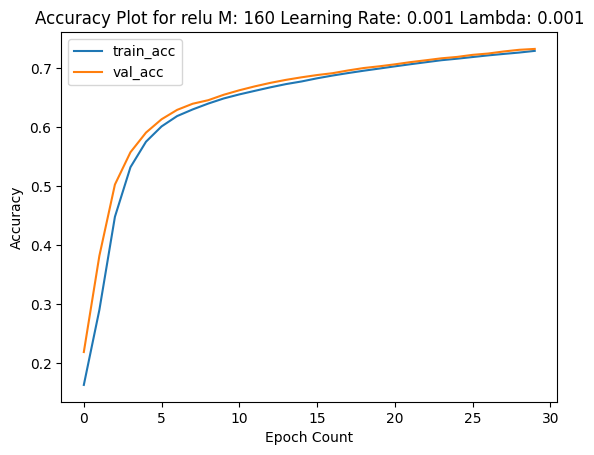

Creating and Traning Sequential model with M: 160 Learning Rate: 0.001 and Lambda: 0.01


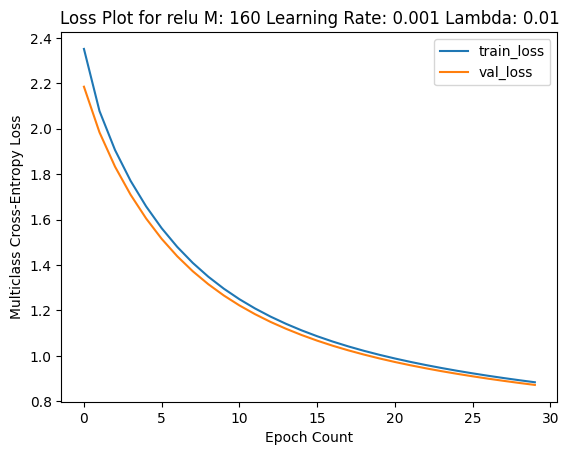

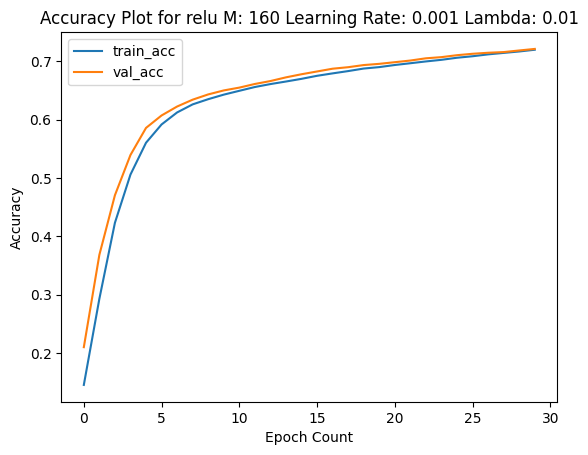

Creating and Traning Sequential model with M: 160 Learning Rate: 0.01 and Lambda: 0.0001


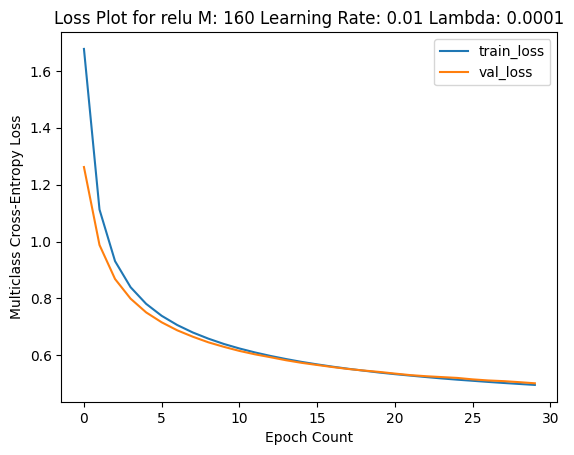

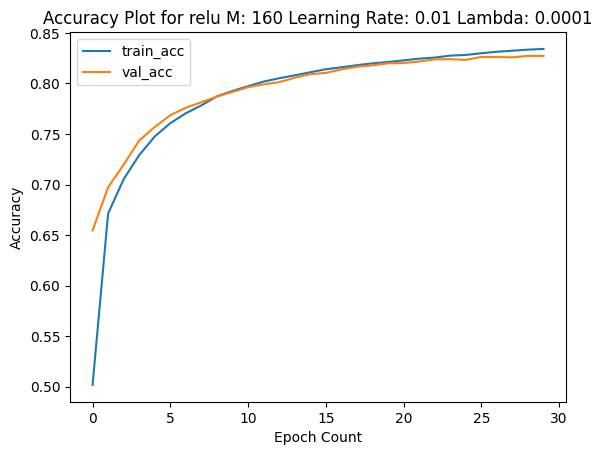

Creating and Traning Sequential model with M: 160 Learning Rate: 0.01 and Lambda: 0.001


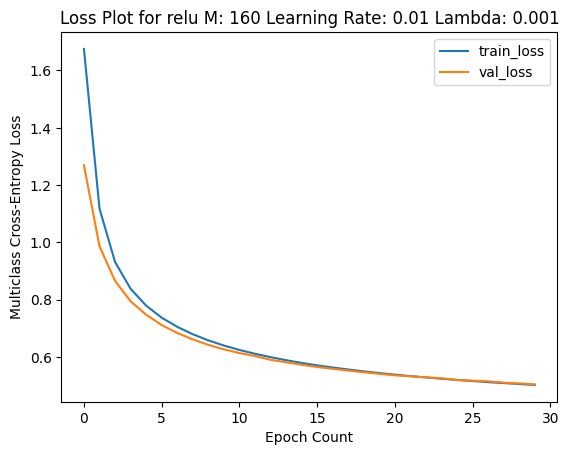

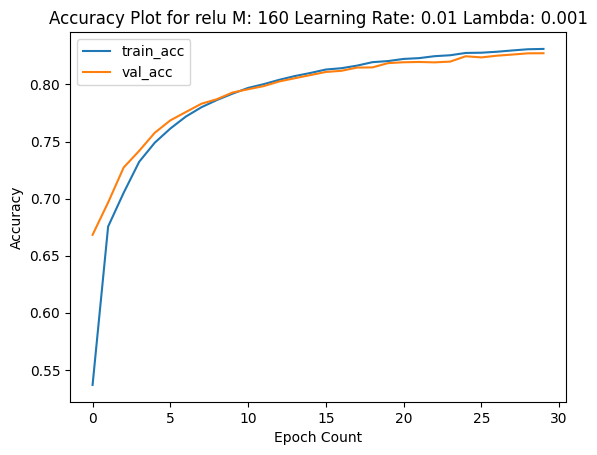

Creating and Traning Sequential model with M: 160 Learning Rate: 0.01 and Lambda: 0.01


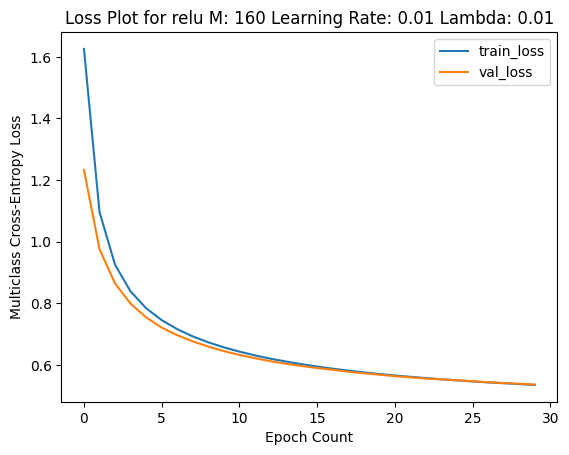

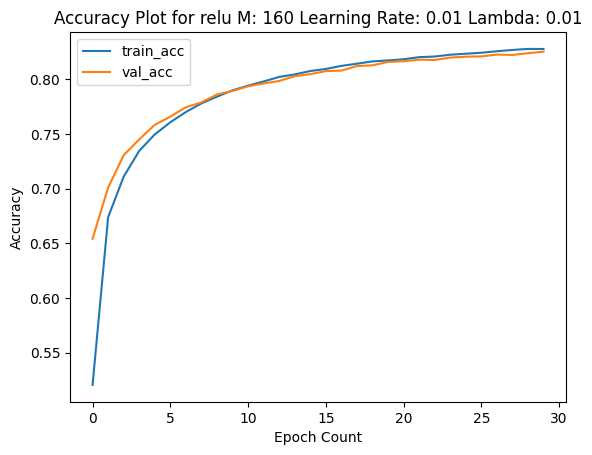

Creating and Traning Sequential model with M: 160 Learning Rate: 0.1 and Lambda: 0.0001


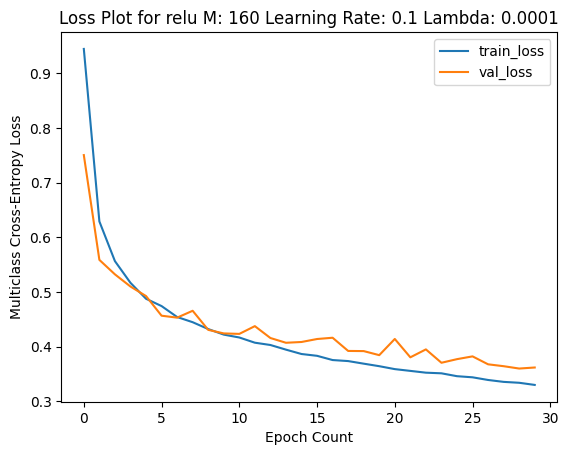

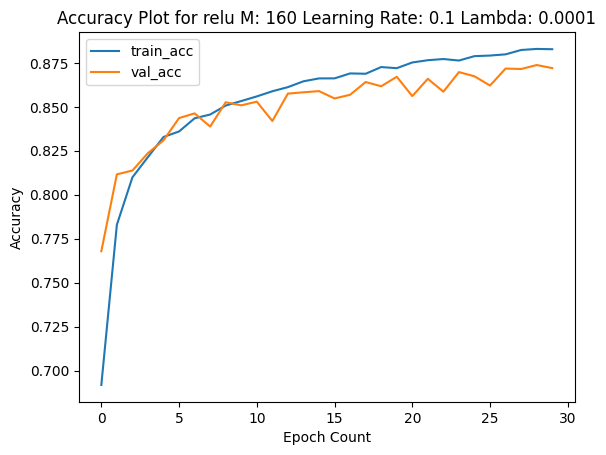

Creating and Traning Sequential model with M: 160 Learning Rate: 0.1 and Lambda: 0.001


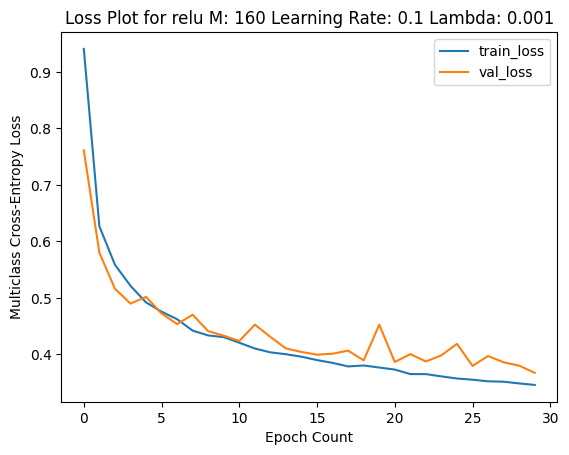

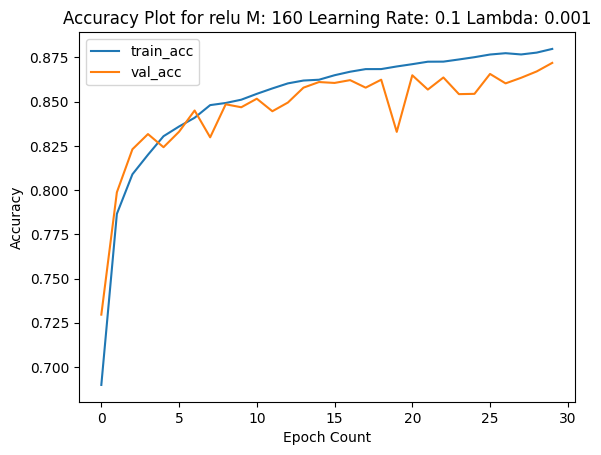

Creating and Traning Sequential model with M: 160 Learning Rate: 0.1 and Lambda: 0.01


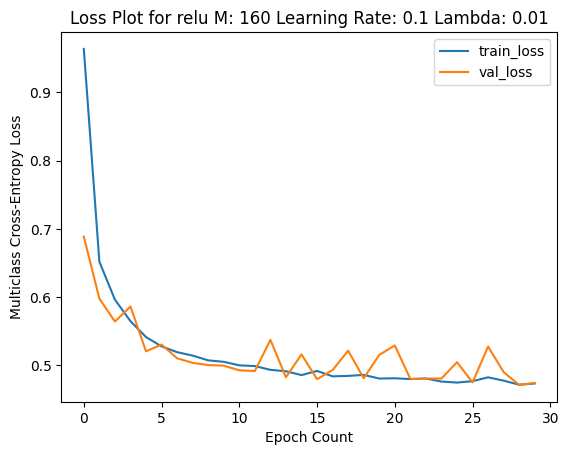

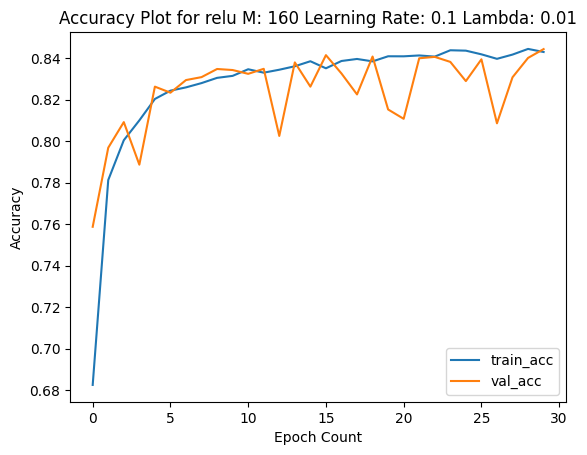

In [ ]:
Ms = [40, 80, 160]
learning_rates = [0.001, 0.01, 0.1]
lambdas = [0.0001, 0.001, 0.01]

best_parameters = None
best_val_acc = 0


for M in Ms:
  for lr in learning_rates:
    for lmbda in lambdas:
      print(f"Creating and Traning Sequential model with M: {M} Learning Rate: {lr} and Lambda: {lmbda}")
      model = SequentialModel(batch_size = 160, 
                              relu_M = M)
      model_history = model.run_1b(learning_rate = lr,
                   weight_decay = lmbda)
      if model_history.history["val_accuracy"].pop() > best_val_acc:
        best_parameters = [M, lr, lmbda]
        best_val_acc = model_history.history["val_accuracy"].pop()

# Part 1c

In [ ]:
print(f"Best Accuracy: {best_val_acc} with M: {best_parameters[0]}, Learning Rate: {best_parameters[1]}, and Lambda: {best_parameters[2]}")

Best Accuracy: 0.8737499713897705 with M: 160, Learning Rate: 0.1, and Lambda: 0.0001


In [10]:
val_accuracies = []

for i in range(5):
  # Creating model with best parameters
  best_model = SequentialModel(batch_size = 160,
                          relu_M = 160).model

  # Creating optimizer
  sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, weight_decay = 0.0001)

  # Compiling, Building, and Evaluating
  best_model.compile(optimizer = sgd_optimizer,
                          loss = "sparse_categorical_crossentropy",
                          metrics = ["accuracy"])
  model_history = best_model.fit(train_x, train_y, 
                          epochs=100, 
                          validation_split = 0.2)
  
  val_accuracies.append(np.max(model_history.history["val_accuracy"]))
  


Epoch 1/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5575 - accuracy: 0.8030 - val_loss: 0.4308 - val_accuracy: 0.8505
Epoch 2/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4099 - accuracy: 0.8518 - val_loss: 0.3984 - val_accuracy: 0.8572
Epoch 3/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3686 - accuracy: 0.8664 - val_loss: 0.3619 - val_accuracy: 0.8685
Epoch 4/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3471 - accuracy: 0.8733 - val_loss: 0.3644 - val_accuracy: 0.8703
Epoch 5/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3285 - accuracy: 0.8790 - val_loss: 0.3506 - val_accuracy: 0.8753
Epoch 6/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3129 - accuracy: 0.8861 - val_loss: 0.3600 - val_accuracy: 0.8686
Epoch 7/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3004 - accuracy: 0.8895 - val_loss: 0.3385 - val_ac

In [11]:
print(f"From best parameters, running model 5 times on 100 epochs\nMean: {np.average(val_accuracies)}\nMax: {np.max(val_accuracies)}\nStandard Deviation: {np.std(val_accuracies)}")

From best parameters, running model 5 times on 100 epochs
Mean: 0.895550012588501
Max: 0.8977500200271606
Standard Deviation: 0.001612972332337005


# Part 1d

In [ ]:
# Creating model with best parameters
best_model = SequentialModel(batch_size = 160,
                        relu_M = 160).model

# Creating optimizer
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, weight_decay = 0.0001)

# Callback (Code from HW7 Helper Functions in Github)
checkpoint_filepath = '/tmp/checkpoint/weights'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Compiling, Building, and Evaluating
best_model.compile(optimizer = sgd_optimizer,
                         loss = "sparse_categorical_crossentropy",
                         metrics = ["accuracy"])
history = best_model.fit(train_x, train_y, 
                         epochs=10, 
                         callbacks=[model_checkpoint_callback],
                         validation_split = 0.2)
# best_model.evaluate(test_x,test_y)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5542 - accuracy: 0.8013 - val_loss: 0.4242 - val_accuracy: 0.8492
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4058 - accuracy: 0.8520 - val_loss: 0.3880 - val_accuracy: 0.8563
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3703 - accuracy: 0.8637 - val_loss: 0.3804 - val_accuracy: 0.8623
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3444 - accuracy: 0.8742 - val_loss: 0.3580 - val_accuracy: 0.8721
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3273 - accuracy: 0.8806 - val_loss: 0.3594 - val_accuracy: 0.8696
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3113 - accuracy: 0.8846 - val_loss: 0.3714 - val_accuracy: 0.8633
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3004 - accuracy: 0.8891 - val_loss: 0.3681 - val_accuracy:

In [ ]:
best_model.load_weights(checkpoint_filepath)
best_model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.3502 - accuracy: 0.8761


[0.3502149283885956, 0.8761000037193298]

# Part 2